In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import math
import cmath
from numba import njit, f8,i8,c16
import numba
import matplotlib.animation as animation
from IPython.display import HTML
import copy
import matplotlib
#import banpei

import sys
sys.path.append('../../lb')
import RungeKutta_acceralated


#パラメーター
nu = 0.001

f = (1 + 1j) * 5 * 0.001

Dimention = 14 #uの次元数
q = 2
k_0 = 2 ** (-4)
k_n = np.zeros((Dimention+4,1))
k_n[2:-2,0] = [k_0 * q ** (i+1) for i in range(Dimention)]
#print(k_n)

c_n_1 = copy.deepcopy(k_n)[2:-2, 0:]
c_n_1[-2:, 0:] = np.zeros((2,1))
#print(c_n_1)

beta = 0.5
c_n_2 = copy.deepcopy(k_n)[1:-3, 0:] * -beta
c_n_2[-1, 0] = np.zeros((1, 1))
#print(c_n_2)

c_n_3 = copy.deepcopy(k_n)[:-4, 0:] * (beta - 1)
#print(c_n_3)

#parameter = [nu,f,k_n,c_n_1,c_n_2,c_n_3]
parameter = {
    'nu' : nu,
    'f' : f,
    'k_n' : k_n,
    'c_n_1' : c_n_1,
    'c_n_2' : c_n_2,
    'c_n_3' : c_n_3
}
#print(parameter)
#print(k_n)

runge_para = {
    'start' :  np.array([
        [0.4350E+00 + 0.5008E+00j],
        [0.1259E+00 + 0.2437E+00j],
        [-0.8312E-01 + -0.4802E-01j],
        [0.5164E-01 + -0.1599E+00j],
        [-0.1899E+00 + -0.3602E-01j],
        [0.4093E-03 + 0.8506E-01j],
        [0.9539E-01 + 0.3215E-01j],
        [-0.5834E-01 + 0.4433E-01j],
        [-0.8790E-02 + 0.2502E-01j],
        [0.3385E-02 + 0.1148E-02j],
        [-0.7072E-04 + 0.5598E-04j],
        [-0.5238E-07 + 0.1467E-06j],
        [0.1E-07 + 0.1E-06j],
        [0.1E-07 + 0.1E-06j]
    ]),
    'step' : 0.005,
    'period' : (0,5000),
    'nu' : nu,
    'f' : f,
    'k_n' : k_n,
    'c_n_1' : c_n_1,
    'c_n_2' : c_n_2,
    'c_n_3' : c_n_3
}

In [69]:
%%time
#縦軸に各変数、横軸時間　×次元数 + flux
runge_para["period"]=(0,500)

start = np.load("../laminar_initials/beta0.417_nu0.00017322774042408294_step0.01_10000.0period_laminar.npy")
runge_para["step"] = 0.001

skip=1

#nu
runge_para["nu"] = 0.00017322774042408294
beta=0.417

#flux of Nth shell
Nth_shell = 3

#c_n_2
runge_para["c_n_2"] = runge_para["k_n"][1:-3, 0:] * -beta
runge_para["c_n_2"][-1, 0:] = np.zeros((1, 1))

#c_n_3
runge_para["c_n_3"] = runge_para["k_n"][:-4, 0:] * (beta - 1)

#インスタンス化
model = RungeKutta_acceralated.RungeKutta()

a = 100
b = 200
epsilon = 1

# 二分探索で閾値を求める
while (b - a) > epsilon:
    c = (a + b) / 2
    runge_para['start'] = start * c
    model.get_arr_latter(**runge_para,latter=1)
    if np.isnan(model.arr_latter[1,-1]):
        b = c
    else:
        a = c

CPU times: user 7.57 s, sys: 87 ms, total: 7.66 s
Wall time: 7.66 s


In [70]:
(a+b)/2

122.265625

In [1]:
%%time
#縦軸に各変数、横軸時間　×次元数 + flux
runge_para["period"]=(0,0.5)

runge_para['start'] = np.load("../laminar_initials/beta0.417_nu0.00017322774042408294_step0.01_10000.0period_laminar.npy")*-3000000
runge_para["step"] = 0.00000001

skip=1000

#nu
runge_para["nu"] = 0.00017322774042408294
beta=0.417

#flux of Nth shell
Nth_shell = 3

#c_n_2
runge_para["c_n_2"] = runge_para["k_n"][1:-3, 0:] * -beta
runge_para["c_n_2"][-1, 0:] = np.zeros((1, 1))

#c_n_3
runge_para["c_n_3"] = runge_para["k_n"][:-4, 0:] * (beta - 1)

#インスタンス化
model = RungeKutta_acceralated.RungeKutta()
model.get_arr_latter(**runge_para,latter=1)

plt.figure(figsize=(20,30))
for i in range(Dimention):
    plt.subplot(Dimention+1,1,i+1)
    plt.ylabel(f"u{i+1}")
    #plt.yscale=("log")
    plt.plot(np.real(model.arr_latter[-1,::skip]),abs(model.arr_latter[i,::skip]),lw=1)

#plt.subplot(Dimention,1,1)
# plt.ylabel(f"u{4}")
# plt.yscale=("log")
# plt.plot(np.real(model.arr_latter[-1,::skip]),abs(model.arr_latter[3,::skip]),lw=0.1)

#plt.savefig(fname=f"../attracter/nu{runge_para['nu']}_beta{beta}_{runge_para['step']}_time{runge_para['period']}_{Dimention}dim_flux_of_{Nth_shell}th.png")

NameError: name 'runge_para' is not defined

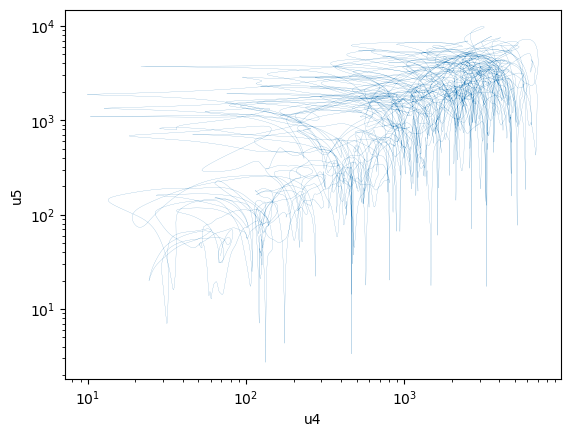

In [7]:
a, b = 3, 4
fig = plt.figure()
ax = plt.subplot(1,1,1)
ax.set_xlabel(f"u{a+1}")
ax.set_ylabel(f'u{b+1}')
ax.set_xscale("log")
ax.set_yscale("log")
ax.plot(np.abs(model.arr_latter[a,10000000:]),np.abs(model.arr_latter[b,10000000:]),lw=0.1)